In [1]:
import XANES2020_code
from XANES2020_code import mirage_analysis
from XANES2020_code.general_tools import imagesc, choose_cal_file
from XANES2020_code.Espec import espec_processing
from datetime import datetime
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
from XANES2020_code.paths import DATA_FOLDER
mirage_analysis.configure(DATA_FOLDER)

from scipy.interpolate import RectBivariateSpline


In [2]:

def data2spec(data):
    screen = eSpec_proc.espec_data2screen(data)
    return eSpec_proc.espec_screen2spec(screen)

def montage_slice(data):
    spec = data2spec(data)
    return RectBivariateSpline(y_mrad,eSpec_proc.eAxis_MeV,spec)(montage_y,montage_x)


In [3]:
run_name = '20200827/run09'

# paths for image warp and dispersion calibrations files
tForm_filepath = choose_cal_file(run_name,1,'Espec_high','Espec_high_transform')
Espec_cal_filepath = choose_cal_file(run_name,1,'Espec_high','Espec_high_disp_cal')

img_bkg = plt.imread(os.path.join(DATA_FOLDER,r'Espec_high/20200907/run01/Shot001.tif'))

# Setup analysis object which stores the relavant meta data and contains functions to run on the espec files
eSpec_proc = espec_processing.ESpec_high_proc(tForm_filepath,Espec_cal_filepath,
                             img_bkg=None,use_median=True,kernel_size=None )
screen_dist_m = 1.48
y_mrad = (eSpec_proc.screen_y_mm-28)/screen_dist_m

montage_y = np.linspace(-20,20,num=50)
montage_x = eSpec_proc.eAxis_MeV

eSpec_spec_pipe = mirage_analysis.DataPipeline('Espec_high', 
                                                  montage_slice, None,
                                                  single_shot_mode=True)

shot_num, data = eSpec_spec_pipe.run(run_name)


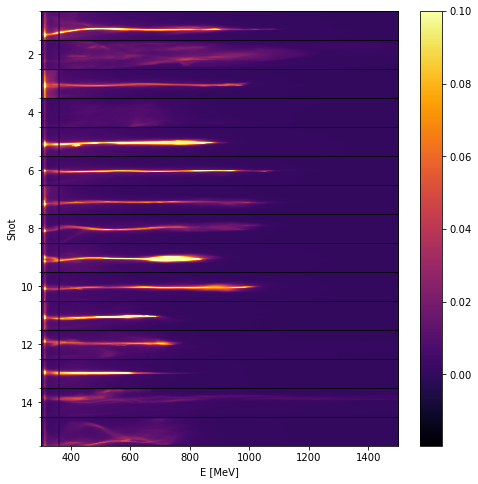

In [19]:
montage = np.concatenate( data, axis=0 )
fig,ax = plt.subplots(1,1,figsize=(8,8))
N_shots = len(data)
y_sep = np.linspace(0.5,N_shots+0.5,N_shots+1)
ih = imagesc(montage,x=montage_x,y=y_sep,ax=ax,
        cmap='inferno',vmax=0.1)
plt.ylabel('Shot')
plt.xlabel('E [MeV]')
cb = plt.colorbar(ih,ax=ax)
ax.set_yticks( y_sep, minor=True)
plt.grid(True,axis='y',which='minor',color='k')
